In [2]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('722_Iteration_4').getOrCreate()

# Import the relevant Python libraries.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
heart_failure= spark.read.csv("heart_failure.csv",inferSchema=True,header=True)

In [4]:
heart_failure.printSchema()
heart_failure.head()

root
 |-- age: double (nullable = true)
 |-- anaemia: integer (nullable = true)
 |-- creatinine_phosphokinase: integer (nullable = true)
 |-- diabetes: integer (nullable = true)
 |-- ejection_fraction: integer (nullable = true)
 |-- high_blood_pressure: integer (nullable = true)
 |-- platelets: double (nullable = true)
 |-- serum_creatinine: double (nullable = true)
 |-- serum_sodium: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- smoking: integer (nullable = true)
 |-- time: integer (nullable = true)
 |-- DEATH_EVENT: integer (nullable = true)



Row(age=75.0, anaemia=0, creatinine_phosphokinase=582, diabetes=0, ejection_fraction=20, high_blood_pressure=1, platelets=265000.0, serum_creatinine=1.9, serum_sodium=130, sex=1, smoking=0, time=4, DEATH_EVENT=1)

In [5]:
heart_failure.dtypes

[('age', 'double'),
 ('anaemia', 'int'),
 ('creatinine_phosphokinase', 'int'),
 ('diabetes', 'int'),
 ('ejection_fraction', 'int'),
 ('high_blood_pressure', 'int'),
 ('platelets', 'double'),
 ('serum_creatinine', 'double'),
 ('serum_sodium', 'int'),
 ('sex', 'int'),
 ('smoking', 'int'),
 ('time', 'int'),
 ('DEATH_EVENT', 'int')]

In [6]:
heart_failure.count()

299

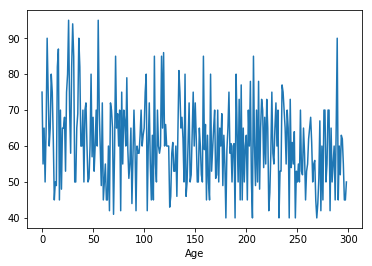

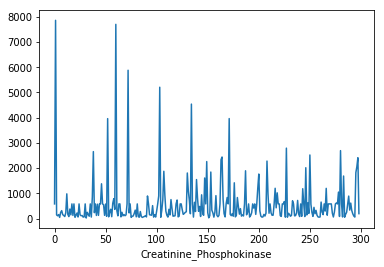

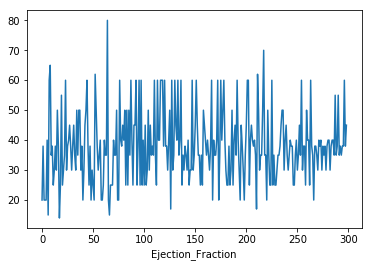

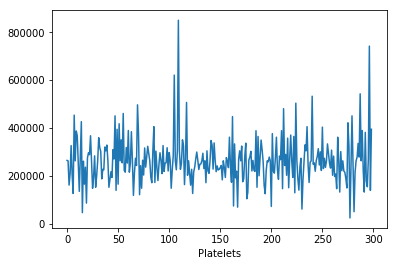

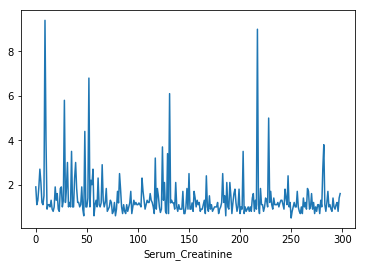

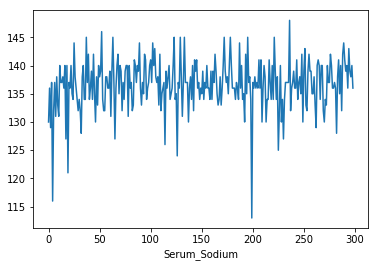

In [7]:
plt.plot(np.array(heart_failure.select('age').collect()))
plt.xlabel("Age")
plt.show()
plt.plot(np.array(heart_failure.select('creatinine_phosphokinase').collect()))
plt.xlabel("Creatinine_Phosphokinase")
plt.show()
plt.plot(np.array(heart_failure.select('ejection_fraction').collect()))
plt.xlabel("Ejection_Fraction")
plt.show()
plt.plot(np.array(heart_failure.select('platelets').collect()))
plt.xlabel("Platelets")
plt.show()
plt.plot(np.array(heart_failure.select('serum_creatinine').collect()))
plt.xlabel("Serum_Creatinine")
plt.show()
plt.plot(np.array(heart_failure.select('serum_sodium').collect()))
plt.xlabel("Serum_Sodium")
plt.show()

In [8]:
heart_failure_missvalue= spark.read.csv("heart_failure_missvalue.csv",inferSchema=True,header=True)
heart_failure_missvalue.select('creatinine_phosphokinase','ejection_fraction',
                               'platelets','serum_creatinine','serum_sodium').show(30)

+------------------------+-----------------+---------+----------------+------------+
|creatinine_phosphokinase|ejection_fraction|platelets|serum_creatinine|serum_sodium|
+------------------------+-----------------+---------+----------------+------------+
|                     582|               20| 265000.0|             1.9|         130|
|                    7861|               38|263358.03|             1.1|         136|
|                     146|               20| 162000.0|             1.3|         129|
|                     111|               20| 210000.0|             1.9|         137|
|                     160|               20| 327000.0|             2.7|         116|
|                      47|               40| 204000.0|             2.1|         132|
|                     246|               15| 127000.0|             1.2|         137|
|                     315|               60| 454000.0|             1.1|         131|
|                    null|               65|263358.03|           

In [9]:
missvalue_sel = heart_failure_missvalue.select('age',
                                               'anaemia',
                                               'creatinine_phosphokinase',
                                               'diabetes',
                                               'ejection_fraction',
                                               'high_blood_pressure',
                                               'platelets',
                                               'serum_creatinine',
                                               'serum_sodium',
                                               'sex',
                                               'smoking',
                                               'DEATH_EVENT')
print(missvalue_sel.count())

299


In [10]:
print(len(heart_failure.columns))
print(len(missvalue_sel.columns))
missvalue_sel.show()

13
12
+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+-----------+
| age|anaemia|creatinine_phosphokinase|diabetes|ejection_fraction|high_blood_pressure|platelets|serum_creatinine|serum_sodium|sex|smoking|DEATH_EVENT|
+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+-----------+
|75.0|      0|                     582|       0|               20|                  1| 265000.0|             1.9|         130|  1|      0|          1|
|55.0|      0|                    7861|       0|               38|                  0|263358.03|             1.1|         136|  1|      0|          1|
|65.0|      0|                     146|       0|               20|                  0| 162000.0|             1.3|         129|  1|      1|          1|
|50.0|      1|                     111|       0|               20|                  0| 2

In [11]:
missvalue_sel2=missvalue_sel.na.drop()
missvalue_sel2.show()
print(missvalue_sel.count())
print(missvalue_sel2.count())

+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+-----------+
| age|anaemia|creatinine_phosphokinase|diabetes|ejection_fraction|high_blood_pressure|platelets|serum_creatinine|serum_sodium|sex|smoking|DEATH_EVENT|
+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+-----------+
|75.0|      0|                     582|       0|               20|                  1| 265000.0|             1.9|         130|  1|      0|          1|
|55.0|      0|                    7861|       0|               38|                  0|263358.03|             1.1|         136|  1|      0|          1|
|65.0|      0|                     146|       0|               20|                  0| 162000.0|             1.3|         129|  1|      1|          1|
|50.0|      1|                     111|       0|               20|                  0| 210000.

In [12]:
heart_failure1=spark.read.csv("heart_failure_missvalue_part1.csv",inferSchema=True,header=True)
print(heart_failure1.count())
heart_failure2=spark.read.csv("heart_failure_missvalue_part2.csv",inferSchema=True,header=True)
print(heart_failure2.count())
intergrating=heart_failure1.union(heart_failure2)
print(intergrating.count())
intergrating.show()

149
150
299
+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+
| age|anaemia|creatinine_phosphokinase|diabetes|ejection_fraction|high_blood_pressure|platelets|serum_creatinine|serum_sodium|sex|smoking|time|DEATH_EVENT|
+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+
|75.0|      0|                     582|       0|               20|                  1| 265000.0|             1.9|         130|  1|      0|   4|          1|
|55.0|      0|                    7861|       0|               38|                  0|263358.03|             1.1|         136|  1|      0|   6|          1|
|65.0|      0|                     146|       0|               20|                  0| 162000.0|             1.3|         129|  1|      1|   7|          1|
|50.0|      1|                     111|       0|    

In [13]:
missvalue_sel2.orderBy('age').show()

+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+-----------+
| age|anaemia|creatinine_phosphokinase|diabetes|ejection_fraction|high_blood_pressure|platelets|serum_creatinine|serum_sodium|sex|smoking|DEATH_EVENT|
+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+-----------+
|40.0|      0|                     624|       0|               35|                  0| 301000.0|             1.0|         142|  1|      1|          0|
|40.0|      1|                     101|       0|               40|                  0| 226000.0|             0.8|         141|  0|      0|          0|
|40.0|      0|                     582|       1|               35|                  0| 222000.0|             1.0|         132|  1|      0|          0|
|40.0|      1|                     129|       0|               35|                  0| 255000.

In [14]:
final_heart_failure = missvalue_sel2.select('age',
                                               'anaemia',
                                               'creatinine_phosphokinase',
                                               'diabetes',
                                               'high_blood_pressure',
                                               'platelets',
                                               'serum_creatinine',
                                               'sex',
                                               'smoking',
                                               'DEATH_EVENT')

In [15]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('tree_methods_adv').getOrCreate()

In [16]:
# Load training data. 
data = spark.read.csv('heart_failure.csv',inferSchema=True,header=True)

In [17]:
# Let's get an idea of what the data looks like. 
data.printSchema()

root
 |-- age: double (nullable = true)
 |-- anaemia: integer (nullable = true)
 |-- creatinine_phosphokinase: integer (nullable = true)
 |-- diabetes: integer (nullable = true)
 |-- ejection_fraction: integer (nullable = true)
 |-- high_blood_pressure: integer (nullable = true)
 |-- platelets: double (nullable = true)
 |-- serum_creatinine: double (nullable = true)
 |-- serum_sodium: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- smoking: integer (nullable = true)
 |-- time: integer (nullable = true)
 |-- DEATH_EVENT: integer (nullable = true)



In [18]:
data.head()

Row(age=75.0, anaemia=0, creatinine_phosphokinase=582, diabetes=0, ejection_fraction=20, high_blood_pressure=1, platelets=265000.0, serum_creatinine=1.9, serum_sodium=130, sex=1, smoking=0, time=4, DEATH_EVENT=1)

In [19]:
# A few things we need to do before Spark can accept the data!
# It needs to be in the form of two columns: "label" and "features".

# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [20]:
# Let's visualise the columns to help with assembly. 
data.columns

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [21]:
# Combine all features into one vector named features.
assembler = VectorAssembler(
  inputCols=['age',
             'anaemia',
             'creatinine_phosphokinase',
             'diabetes',
             'ejection_fraction',
             'high_blood_pressure',
             'platelets',
             'serum_creatinine',
             'serum_sodium',
             'sex',
             'smoking',
             'time'],
              outputCol="features")

In [22]:
# Let's transform the data. 
output = assembler.transform(data)

In [23]:
# Let's import the string indexer (similar to the logistic regression exercises).
from pyspark.ml.feature import StringIndexer

In [24]:
indexer = StringIndexer(inputCol="DEATH_EVENT", outputCol="DEATH_EVENTIndex")
output_fixed = indexer.fit(output).transform(output)

In [25]:
# Let's select the two columns we want. Features (which contains vectors), and the predictor.
final_data = output_fixed.select("features",'DEATH_EVENTIndex')

In [26]:
# Split the training and testing set.
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [27]:
# Let's import the relevant classifiers. 
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

In [28]:
# Use defaults to make the comparison "fair". This simplifies the comparison process.

dtc = DecisionTreeClassifier(labelCol='DEATH_EVENTIndex',featuresCol='features')
rfc = RandomForestClassifier(labelCol='DEATH_EVENTIndex',featuresCol='features')
gbt = GBTClassifier(labelCol='DEATH_EVENTIndex',featuresCol='features')

In [29]:
# Train the models (it's three models, so it might take some time).
dtc_model = dtc.fit(train_data)
rfc_model = rfc.fit(train_data)
gbt_model = gbt.fit(train_data)

In [30]:
dtc_predictions = dtc_model.transform(test_data)
rfc_predictions = rfc_model.transform(test_data)
gbt_predictions = gbt_model.transform(test_data)

In [31]:
# Let's start off with binary classification.
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Note that the label column isn't named label, it's named PrivateIndex in this case.
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'DEATH_EVENTIndex')

In [34]:
# This is the area under the curve. This indicates that the data is highly seperable.
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))

# RFC improves accuracy but also model complexity. RFC outperforms DTC in nearly every situation.
print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

# We can't repeat these exact steps for GBT. If you print the schema of all three, you may be able to notice why.
# Instead, let's redefine the object:
my_binary_gbt_eval = BinaryClassificationEvaluator(labelCol='DEATH_EVENTIndex', rawPredictionCol='prediction')
print("GBT")
print(my_binary_gbt_eval.evaluate(gbt_predictions))

# Interesting, GBT didn't perform as well as RFC or DTC. But that's because we left the model's settings as default. 
# In most cases, we should adjust these parameters. More trees may increase accuracy, but decrease precision and recall. 


DTC
0.49533898305084745
RFC
0.9025423728813561
GBT
0.7072033898305085


In [38]:
rfc = RandomForestClassifier(labelCol='DEATH_EVENTIndex',featuresCol='features',numTrees=5)
rfc_model = rfc.fit(train_data)
rfc_predictions = rfc_model.transform(test_data)
print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

RFC
0.8699152542372882


In [48]:
rfc = RandomForestClassifier(labelCol='DEATH_EVENTIndex',featuresCol='features',numTrees=20)
rfc_model = rfc.fit(train_data)
rfc_predictions = rfc_model.transform(test_data)
print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

RFC
0.9025423728813561


In [49]:
rfc = RandomForestClassifier(labelCol='DEATH_EVENTIndex',featuresCol='features',numTrees=40)
rfc_model = rfc.fit(train_data)
rfc_predictions = rfc_model.transform(test_data)
print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

RFC
0.9


In [41]:
# Let's import the evaluator.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [42]:
# Select (prediction, true label) and compute test error. 
acc_evaluator = MulticlassClassificationEvaluator(labelCol="DEATH_EVENTIndex", predictionCol="prediction", metricName="accuracy")

In [53]:
rfc = RandomForestClassifier(labelCol='DEATH_EVENTIndex',featuresCol='features',numTrees=20)
rfc_model = rfc.fit(train_data)
rfc_predictions = rfc_model.transform(test_data)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)

In [54]:
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)

A random forest ensemble has an accuracy of: 84.81%
----------------------------------------
